# Effect Size, P-Values and Power - Lab

## Introduction 

In this lab, you'll run simulations to continue to investigate the relationship between effect size, p-values, power and sample size!

## Objectives
You will be able to:
* Describe how effect size, sample size and p_value are related to each other. 
* Use Welch's t-test for distributions that do not have a normality assumption.
* Plot visualisations to confirm the calculations and intuitions towards p_value and effect size. 
* Explain how with a same effect size, we may see different p_values with increasing number of simulations. 

## Philosophical Review

Remember that the underlying question behind all hypothesis tests is:

>"What is the probability I would see this effect due to random fluctuations if there was actually no effect?" 

This is exactly what a p-value represents: the chance that the observed data would satisfy the null hypothesis. As such, if the p-value is sufficiently low, you can declare the results statistically significant and reject the null hypothesis. Recall that this threshold is defined as $\alpha$, and is also the rate of type I errors. In this lab, you'll investigate the robustness of p-values and their relation with effect-size and sample-size. 

## Import Starter Functions

To start, import the functions stored in the `flatiron_stats.py` file. It contains the stats functions that you previously coded in the last lab: `welch_t(a,b)`, `welch_df(a, b)` and `p_value(a, b, two_sided=False)`. You'll then use these functions below to further investigate the relationship between p-values and sample size.

In [1]:
#Your code here; import the contents from flatiron_stats.py
from flatiron_stats import *
#You may also wish to open up flatiron_stats.py in a text editor to preview its contents.

## Generating Random Samples

Before you start running simulations, it will be useful to have a helper function that will generate random samples. Write such a function below which generates 2 random samples from 2 normal distributions. The function should take 6 input parameters:

* m1 - The underlying population mean for sample 1
* s1 - The underlying population standard deviation for sample 1
* n1 - The sample size for sample 1

* m2 - The underlying population mean for sample 2
* s2 - The underlying population standard deviation for sample 2
* n2 - The sample size for sample 2

In [2]:
import numpy as np
def generate_samples(m1,s1,n1,m2,s2,n2):
    sample1=np.random.normal(m1, s1, n1)
    sample2=np.random.normal(m2,s2,n2)
    
    #Your code here; have the function create two random samples using the input parameters
    return sample1, sample2

## Running a Simulation

For your first simulation, you're going to investigate how the p-value of an experiment relates to sample size when both samples are from identical underlying distributions. To do this, use your `generate_samples()` function along with the `p_value_welch_ttest()` function defined in the flatiron_stats file. Use sample sizes from 5 to 750. For each sample size, simulate 100 experiments. For each of these experiments, generate 2 samples of the given sample size. Each sample should have a standard deviation of 1. The first sample should have a mean of 5 and the second should have a mean of 5 plus the effect size, you hope to detect. Calculate the corresponding p-values for a Welch's t-test for each of these sample-pairs. Finally, use the p-values to calculate the power of the test. Remember that for all of the simulations where the effect size does not equal zero, the null hypothesis is not true. Store the overall power from the 100 simulations along with the corresponding sample size and effect size. Use varying effect sizes such as [0, 0.01,.1,.2, .5, 1, 2]. Afterwards, you'll then plot power vs sample size for various effect sizes.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [4]:
def power_calc(control_mean, control_sd, experimental_mean, experimental_sd, sample_size, n_sim):
    np.random.seed(10)
    # Initialize array to store results
    p = (np.empty(n_sim))
    p.fill(np.nan)
    

    #  Run a for loop for range of values in n_sim
    num_rejects=0
    for s in range(n_sim):
        control=np.random.normal(control_mean, control_sd, sample_size)
        experimental=np.random.normal(experimental_mean, experimental_sd, sample_size)
        t_test = stats.ttest_ind(control, experimental, equal_var=False)
        p[s] = t_test[1]
        #print(p[s])

       # print(num_rejects)    

    # number of null hypothesis rejections
    num_null_rejects = np.sum(p < 0.05)
    power = num_null_rejects/n_sim

    return power

In [5]:
#Your code here
from flatiron_stats import *
import pandas as pd
p_by_effect_size_sample={}

#df.columns=('effects_size', 'power', 'sample_size')

effect_sizes=[0, 0.01,.1,.2, .5, 1, 2]

m1 =5
s1 = 1
s2 = 1

n_sim=100
for effect_size in effect_sizes:
    p_by_sample={}
    sample_size=5
    m2=5+effect_size
    while sample_size < 750:
        power=power_calc(m1, s1, m2,s2, sample_size, n_sim)
        p_by_sample[sample_size]=power
        sample_size=sample_size+1
        print(sample_size)
    p_by_effect_size_sample[effect_size]=p_by_sample
        

print('done')       

    
    
# for effect size:
#     for sample_size:
#         perform 100 simulations
#         calculate power
#         store effect_size, sample_size, power for simulations

6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
28

638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
16

528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
4

In [6]:
print(p_by_effect_size_sample)

{0: {5: 0.06, 6: 0.03, 7: 0.06, 8: 0.06, 9: 0.07, 10: 0.02, 11: 0.04, 12: 0.03, 13: 0.03, 14: 0.03, 15: 0.03, 16: 0.01, 17: 0.03, 18: 0.07, 19: 0.06, 20: 0.04, 21: 0.05, 22: 0.04, 23: 0.04, 24: 0.05, 25: 0.03, 26: 0.03, 27: 0.08, 28: 0.07, 29: 0.02, 30: 0.05, 31: 0.04, 32: 0.03, 33: 0.01, 34: 0.06, 35: 0.04, 36: 0.06, 37: 0.05, 38: 0.03, 39: 0.04, 40: 0.03, 41: 0.06, 42: 0.01, 43: 0.06, 44: 0.05, 45: 0.07, 46: 0.02, 47: 0.03, 48: 0.08, 49: 0.03, 50: 0.06, 51: 0.04, 52: 0.05, 53: 0.06, 54: 0.04, 55: 0.06, 56: 0.07, 57: 0.03, 58: 0.05, 59: 0.05, 60: 0.08, 61: 0.06, 62: 0.03, 63: 0.04, 64: 0.04, 65: 0.02, 66: 0.07, 67: 0.04, 68: 0.02, 69: 0.04, 70: 0.04, 71: 0.04, 72: 0.06, 73: 0.04, 74: 0.05, 75: 0.05, 76: 0.07, 77: 0.06, 78: 0.06, 79: 0.03, 80: 0.07, 81: 0.04, 82: 0.02, 83: 0.06, 84: 0.04, 85: 0.06, 86: 0.01, 87: 0.03, 88: 0.02, 89: 0.06, 90: 0.03, 91: 0.07, 92: 0.05, 93: 0.05, 94: 0.05, 95: 0.02, 96: 0.02, 97: 0.03, 98: 0.08, 99: 0.07, 100: 0.03, 101: 0.07, 102: 0.07, 103: 0.02, 104: 0

Now that you've simulated the data, go ahead and graph it! Label the x-axis sample size, the y-axis power, and be sure to include a legend for the various effect sizes.

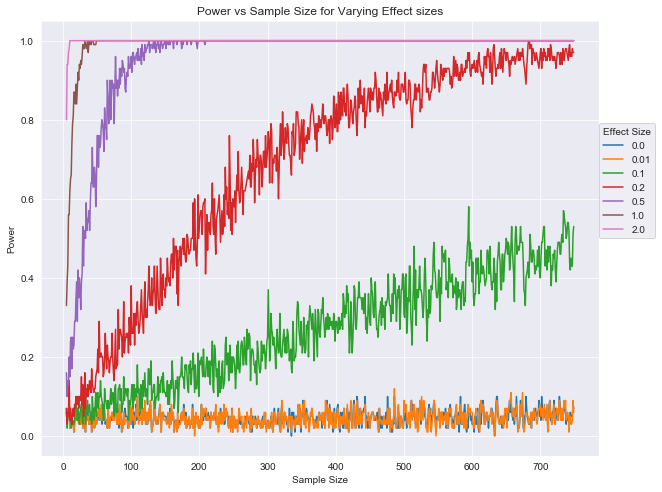

In [7]:
#You code here
df = pd.DataFrame.from_dict(p_by_effect_size_sample)
df.plot(figsize=(10,8))
plt.title('Power vs Sample Size for Varying Effect sizes')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.legend(title='Effect Size', loc=(1,0.5))





As you can see, it's also typically incredibly difficult (if not impossible) to accuractely detect effect sizes below .1!

## Summary

This lesson summarizes and further builds upon the ideas that we saw in the previous labs. We learnt how p_value can be described as a function of effect size and for a given effect size, the p_value may get lower if we increase the sample size considerably. We also saw how p_value alone can not be used in order to identify some results as truly siginifcant, as this can be achieved when there is not a significant effect size. 